### Prognosticate Dunes on the surface of Mars using Convolutional Neural Network

AUTHOR:  Anurag Dutta (anuragdutta.research@gmail.com)

CREATED: 2023-01-06 22:45:50

DATASET: https://github.com/Anurag-Dutta/Prognosticate-Dunes-on-the-surface-of-Mars-using-Convolutional-Neural-Network/tree/main/dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(64, 64)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(64, 64)
)

Found 1904 files belonging to 2 classes.
Found 123 files belonging to 2 classes.


In [3]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3, 3),padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3, 3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3, 3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                        

In [6]:
model.compile(optimizer='AdaGrad',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
60/60 [==============================] - 7s 119ms/step - loss: 0.1261 - accuracy: 0.9517 - val_loss: 0.4161 - val_accuracy: 0.8211
Epoch 2/15
60/60 [==============================] - 8s 138ms/step - loss: 0.0987 - accuracy: 0.9632 - val_loss: 0.4088 - val_accuracy: 0.8293
Epoch 3/15
60/60 [==============================] - 9s 149ms/step - loss: 0.0985 - accuracy: 0.9622 - val_loss: 0.4493 - val_accuracy: 0.8211
Epoch 4/15
60/60 [==============================] - 9s 152ms/step - loss: 0.0932 - accuracy: 0.9711 - val_loss: 0.4634 - val_accuracy: 0.8293
Epoch 5/15
60/60 [==============================] - 9s 152ms/step - loss: 0.0970 - accuracy: 0.9643 - val_loss: 0.3941 - val_accuracy: 0.8537
Epoch 6/15
60/60 [==============================] - 9s 153ms/step - loss: 0.0859 - accuracy: 0.9690 - val_loss: 0.4038 - val_accuracy: 0.8130
Epoch 7/15
60/60 [==============================] - 9s 152ms/step - loss: 0.0881 - accuracy: 0.9732 - val_loss: 0.4546 - val_accuracy: 0.8130
Epoch 

In [15]:
model.evaluate(validation_ds)

4/4 [==============================] - 0s 33ms/step - loss: 0.4188 - accuracy: 0.8211


[0.4187942147254944, 0.8211382031440735]

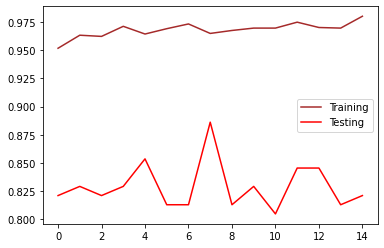

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='brown',label='Training')
plt.plot(history.history['val_accuracy'],color='red',label='Testing')
plt.legend()
plt.show()

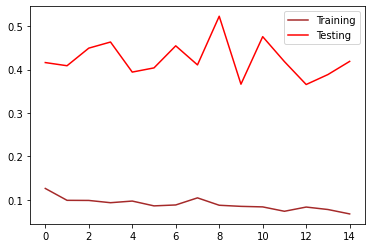

In [17]:
plt.plot(history.history['loss'],color='brown',label='Training')
plt.plot(history.history['val_loss'],color='red',label='Testing')
plt.legend()
plt.show()